## 1. Introduction

#### Objective:

The goal of this project is to analyze customer churn data, identify key factors influencing churn, and develop a predictive model to classify customers as churned or retained.

#### Dataset Overview:

The dataset contains customer information with the following key features:

Customer Demographics: State, Account Length, Area Code

Service Plans: International Plan, Voice Mail Plan

Usage Statistics: Total Day, Evening, Night, and International Minutes, Calls, and Charges

Customer Service Interactions: Customer Service Calls

Target Variable: Churn

## 2. Data Preprocessing
#### Step 1: Load the Dataset

In [26]:
import pandas as pd

data = pd.read_csv(r"C:\Users\Lenovo\OneDrive\Documents\Python Assignment\Python Internship Project\Data Set For Task-20250218T084113Z-001\Churn Prdiction Data\churn-bigml-80.csv")
print(data.head())

  State  Account length  Area code International plan Voice mail plan  \
0    ks             128        415                 no             yes   
1    oh             107        415                 no             yes   
2    nj             137        415                 no              no   
3    oh              84        408                yes              no   
4    ok              75        415                yes              no   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47   

#### Step 2: Handle Missing Values

In [27]:
print(data.isnull().sum())  # Check for missing values
data = data.dropna()  # Remove missing values

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64


#### Step 3: Check & Remove Duplicates 

In [28]:
# Check duplicates
# Check for missing values
print("Duplicate values in Churn dataset:\n", data.duplicated().sum())

Duplicate values in Churn dataset:
 0


In [29]:
# Remove duplicate rows, keeping the first occurrence
data= data.drop_duplicates()

#### Step 4: Standardize Categorical Variables

In [30]:
print(data.columns)

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')


In [35]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data['Churn'] = encoder.fit_transform(data['Churn'])
data['International plan'] = encoder.fit_transform(data['International plan'])
data['Voice mail plan'] = encoder.fit_transform(data['Voice mail plan'])

## 3. Exploratory Data Analysis (EDA)

#### Step 5: Summary Statistics

In [36]:
print(data.describe())

       Account length    Area code  International plan  Voice mail plan  \
count     2666.000000  2666.000000         2666.000000      2666.000000   
mean       100.620405   437.438860            0.101275         0.274944   
std         39.563974    42.521018            0.301750         0.446570   
min          1.000000   408.000000            0.000000         0.000000   
25%         73.000000   408.000000            0.000000         0.000000   
50%        100.000000   415.000000            0.000000         0.000000   
75%        127.000000   510.000000            0.000000         1.000000   
max        243.000000   510.000000            1.000000         1.000000   

       Number vmail messages  Total day minutes  Total day calls  \
count            2666.000000         2666.00000      2666.000000   
mean                8.021755          179.48162       100.310203   
std                13.612277           54.21035        19.988162   
min                 0.000000            0.00000     

#### Step 6: Visualizations

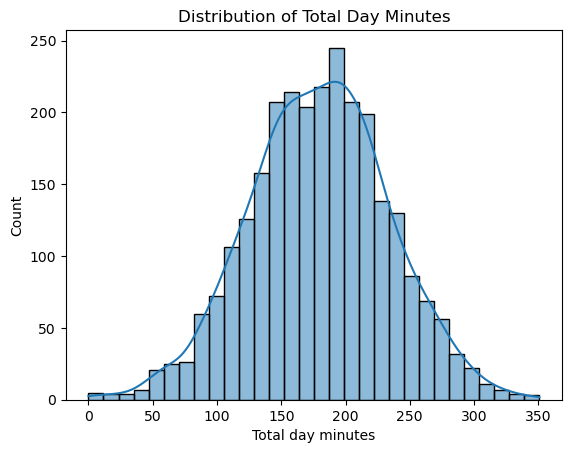

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(data['Total day minutes'], bins=30, kde=True)
plt.title('Distribution of Total Day Minutes')
plt.show()

#### Step 7: Correlation Analysis

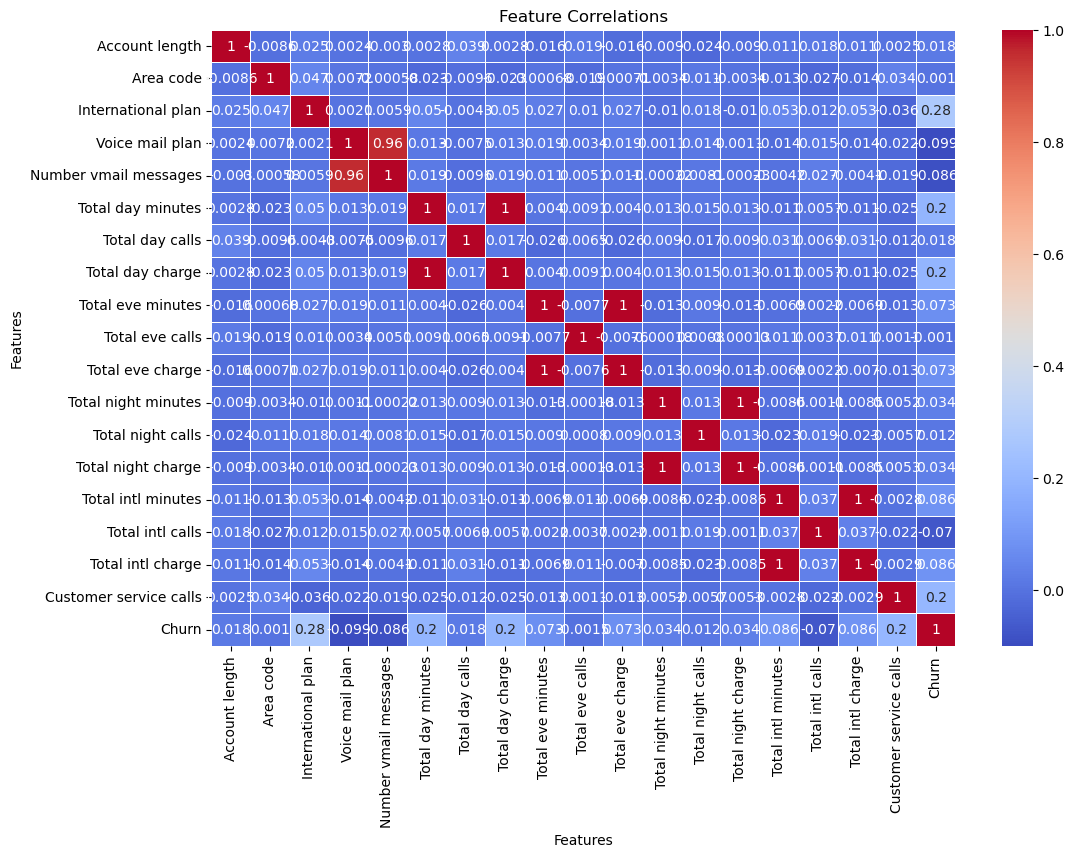

In [39]:
plt.figure(figsize=(12,8))
# Ensure only numeric columns are used for correlation
numeric_data = data.select_dtypes(include=['number'])
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5, cbar=True)
plt.title('Feature Correlations')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

## 4. Feature Engineering

#### Step 8: Feature Selection & Scaling

In [40]:
from sklearn.preprocessing import StandardScaler

features = ['Account length', 'Total day minutes', 'Total day calls', 'Total day charge', 
            'Total eve minutes', 'Total eve calls', 'Total eve charge', 'Total night minutes',
            'Total night calls', 'Total night charge', 'Total intl minutes', 'Total intl calls',
            'Total intl charge', 'Customer service calls']

scaler = StandardScaler()
data[features] = scaler.fit_transform(data[features])

## 5. Model Training & Evaluation

#### Step 9: Train-Test Split

In [42]:
from sklearn.model_selection import train_test_split

X = data[features]
y = data['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Step 10: Train Classification Models

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       455
           1       0.79      0.48      0.60        79

    accuracy                           0.90       534
   macro avg       0.85      0.73      0.77       534
weighted avg       0.90      0.90      0.89       534



#### Step 11: Model Evaluation

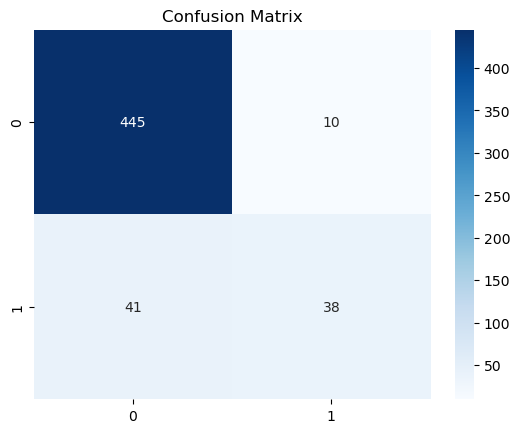

In [44]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [46]:
data.to_csv("Analysed Churn Prediction.csv",index=False)